<a href="https://colab.research.google.com/github/lmoroney/tfbook/blob/master/chapter6/sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-04-17 05:52:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-04-17 05:52:37 (41.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

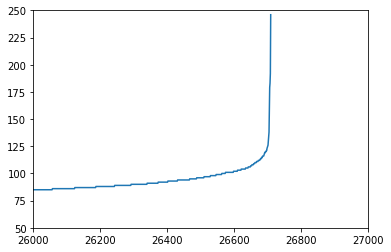

85


In [6]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [0]:
vocab_size = 8000
embedding_dim = 10
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
wc=tokenizer.word_counts
print(wc)

OrderedDict([('former', 75), ('versace', 1), ('store', 35), ('clerk', 8), ('sues', 12), ('secret', 68), ('black', 203), ('code', 16), ('minority', 11), ('shoppers', 2), ('roseanne', 3), ('revival', 9), ('catches', 9), ('thorny', 1), ('political', 68), ('mood', 10), ('better', 96), ('worse', 33), ('mom', 142), ('starting', 32), ('fear', 36), ('sons', 32), ('web', 13), ('series', 46), ('closest', 4), ('thing', 105), ('will', 427), ('grandchild', 2), ('boehner', 24), ('just', 430), ('wants', 109), ('wife', 67), ('listen', 20), ('not', 555), ('come', 85), ('alternative', 12), ('debt', 21), ('reduction', 4), ('ideas', 33), ('j', 37), ('k', 37), ('rowling', 4), ('wishes', 28), ('snape', 2), ('happy', 45), ('birthday', 50), ('magical', 24), ('way', 206), ('advancing', 2), ('worlds', 69), ('women', 255), ('fascinating', 3), ('case', 67), ('eating', 53), ('lab', 8), ('grown', 16), ('meat', 23), ('ceo', 48), ('send', 28), ('kids', 141), ('school', 180), ('work', 146), ('company', 72), ('top', 88

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'not': 5, 'just': 6, 'will': 7, 'one': 8, 'year': 9, 'report': 10, 'area': 11, 'u': 12, 'donald': 13, 'day': 14, 's': 15, 'says': 16, 'can': 17, 'woman': 18, 'time': 19, 'first': 20, 'no': 21, 'get': 22, 'like': 23, 'old': 24, 'off': 25, 'trumps': 26, 'now': 27, 'life': 28, 'people': 29, 'obama': 30, 'women': 31, 'house': 32, 'white': 33, 'back': 34, 'make': 35, 'still': 36, 'clinton': 37, 'world': 38, '5': 39, 'americans': 40, 'way': 41, 'years': 42, 'black': 43, 'family': 44, 'study': 45, 'best': 46, 'gop': 47, 'show': 48, 'bill': 49, 'school': 50, 'president': 51, 'police': 52, '3': 53, 'know': 54, 'american': 55, 'last': 56, 'watch': 57, 'good': 58, 'cant': 59, 'really': 60, 'going': 61, '10': 62, 'video': 63, 'death': 64, 'things': 65, 'hillary': 66, 'love': 67, 'finds': 68, 'home': 69, 'state': 70, 'nation': 71, 'may': 72, 'say': 73, 'need': 74, 'health': 75, 'right': 76, 'work': 77, 'take': 78, '2': 79, 'every': 80, '000': 81, 'dead':

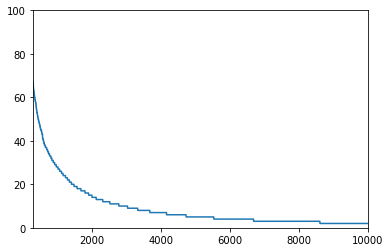

28
15


In [11]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [0]:
print(ys[3125])
print(ys[10000])
print(ys[12156])

In [0]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [40]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 10)          80000     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 80,097
Trainable params: 80,097
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 200
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/200
625/625 - 2s - loss: 0.6901 - accuracy: 0.5368 - val_loss: 0.6859 - val_accuracy: 0.5633
Epoch 2/200
625/625 - 2s - loss: 0.6853 - accuracy: 0.5603 - val_loss: 0.6840 - val_accuracy: 0.5633
Epoch 3/200
625/625 - 2s - loss: 0.6840 - accuracy: 0.5603 - val_loss: 0.6829 - val_accuracy: 0.5633
Epoch 4/200
625/625 - 2s - loss: 0.6828 - accuracy: 0.5603 - val_loss: 0.6817 - val_accuracy: 0.5633
Epoch 5/200
625/625 - 2s - loss: 0.6812 - accuracy: 0.5603 - val_loss: 0.6800 - val_accuracy: 0.5633
Epoch 6/200
625/625 - 2s - loss: 0.6789 - accuracy: 0.5603 - val_loss: 0.6779 - val_accuracy: 0.5633
Epoch 7/200
625/625 - 2s - loss: 0.6759 - accuracy: 0.5604 - val_loss: 0.6746 - val_accuracy: 0.5633
Epoch 8/200
625/625 - 2s - loss: 0.6720 - accuracy: 0.5605 - val_loss: 0.6710 - val_accuracy: 0.5631
Epoch 9/200
625/625 - 2s - loss: 0.6673 - accuracy: 0.5612 - val_loss: 0.6663 - val_accuracy: 0.5652
Epoch 10/200
625/625 - 2s - loss: 0.6617 - accuracy: 0.5677 - val_loss: 0.6610 - val_accura

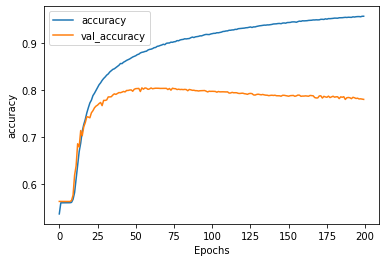

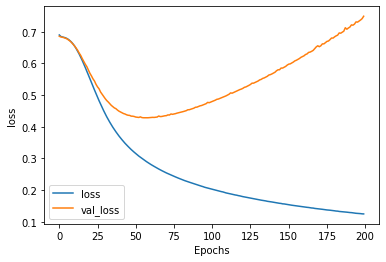

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

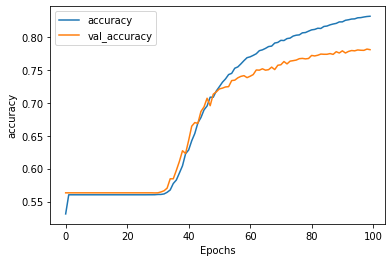

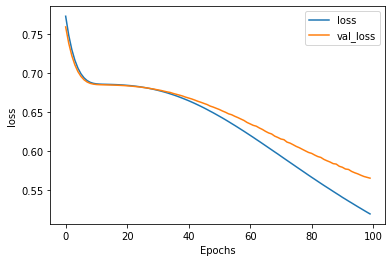

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [0]:
print(reverse_word_index[2])
print(weights[2])

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
sentences = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "TensorFlow book will be a best seller"]
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)
print(model.predict(padded))